# Proyecto de analisis de viajes de usuarios en app de servicio de viajes


Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

Se recuperaron datos del clima de Chicago desde un sitio web. Ahora después de realizar las consultas con SQL, se trabajará con los resultados obtenidos.


## Análisis exploratorio de datos

### Importar librerias

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from scipy      import stats  as st

### Importar archivos y leerlos
Los resultados del preprocesamiento y preparación de los datos van en el orden en que se importan los archivos.

In [ ]:

# Número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017
trips = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_01.csv')

# Promedio de viajes que terminaron en cada barrio de Chicago en noviembre de 2017
trips_avg = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_04.csv')

# Datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare
trips_airport = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_07.csv')

### Preprocesamiento: Visualizacion preliminar

In [ ]:
display(trips.head(30))
print('\n')
display(trips.info(show_counts = True))
print('\n')
display(trips.describe())
print('\n')

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


None

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [ ]:
display(trips_avg.head(30))
print('\n')
display(trips_avg.info(show_counts = True))
print('\n')
display(trips_avg.describe())

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [ ]:
display(trips_airport.head(30))
print('\n')
display(trips_airport.info(show_counts = True))
print('\n')
display(trips_airport.describe())
print('\n')

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


None

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


### Duplicados

Verificando duplicados de los 3 dataframe

In [ ]:
print( trips [ trips.duplicated() == True ] )

# Si es "Empty DataFrame" = No hay filas duplicadas

Empty DataFrame
Columns: [company_name, trips_amount]
Index: []


In [ ]:
print( trips_avg [ trips_avg.duplicated() == True ] )

# Si es "Empty DataFrame" = No hay filas duplicadas

Empty DataFrame
Columns: [dropoff_location_name, average_trips]
Index: []


In [ ]:
print( trips_airport [ trips_airport.duplicated() == True ] )

# Si es "Empty DataFrame" = No hay filas duplicadas

                 start_ts weather_conditions  duration_seconds
62    2017-11-11 06:00:00               Good            1260.0
74    2017-11-11 08:00:00               Good            1380.0
76    2017-11-04 09:00:00               Good            1380.0
117   2017-11-11 07:00:00               Good            1380.0
119   2017-11-04 14:00:00               Good            3300.0
...                   ...                ...               ...
1054  2017-11-11 07:00:00               Good            1380.0
1058  2017-11-25 12:00:00               Good            1440.0
1062  2017-11-11 06:00:00               Good            1500.0
1065  2017-11-11 13:00:00               Good            2100.0
1066  2017-11-11 08:00:00               Good            1380.0

[197 rows x 3 columns]


### Valores nulos

In [ ]:
# Valores ausentes en las columnas

display( trips[trips['company_name'].isna()] )

display( trips[trips['trips_amount'].isna()] )

# Si es "Empty DataFrame" = No hay filas con valor nulo de la columna

,company_name,trips_amount


,company_name,trips_amount


In [ ]:
# Valores ausentes en las columnas

display( trips_avg[trips_avg['dropoff_location_name'].isna()] )

display( trips_avg[trips_avg['average_trips'].isna()] )

# Si es "Empty DataFrame" = No hay filas con valor nulo de la columna

,dropoff_location_name,average_trips


,dropoff_location_name,average_trips


In [ ]:
# Valores ausentes en las columnas

display( trips_airport[trips_airport['start_ts'].isna()] )

display( trips_airport[trips_airport['weather_conditions'].isna()] )

display( trips_airport[trips_airport['duration_seconds'].isna()] )

# Si es "Empty DataFrame" = No hay filas con valor nulo de la columna

,start_ts,weather_conditions,duration_seconds


,start_ts,weather_conditions,duration_seconds


,start_ts,weather_conditions,duration_seconds


### Observaciones

- Cada dataframe tiene diferente numero de columnas
- No hay valores duplicados, en el caso de los duplicados de trips_airport, no aplica, porque varios pueden tener la misma fecha y hora, clima y duración.

## Preparación de los datos

- En esta ocasión no se requiere correcciones de duplicados o valores nulos, porque no hubieron
- Sin embargo, si el tipo de datos para trips_airport a formato datetime en la columna start_ts

### Cambiar tipo de dato

In [ ]:
# Convertir de string a float (Columna 'start_ts')

trips_airport['start_ts'] = trips_airport['start_ts'].astype('datetime64')

trips_airport.info()
print()
print( trips_airport['start_ts'] )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB

0      2017-11-25 16:00:00
1      2017-11-25 14:00:00
2      2017-11-25 12:00:00
3      2017-11-04 10:00:00
4      2017-11-11 07:00:00
               ...        
1063   2017-11-25 11:00:00
1064   2017-11-11 10:00:00
1065   2017-11-11 13:00:00
1066   2017-11-11 08:00:00
1067   2017-11-04 16:00:00
Name: start_ts, Length: 1068, dtype: datetime64[ns]


## Analiisis

### 10 barrios principales en términos de finalización del recorrido

In [ ]:
top_10_neighbhd = trips_avg.groupby('dropoff_location_name')[['average_trips']].sum().sort_values(by='average_trips', ascending=False).reset_index()

display(top_10_neighbhd.head(10))

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


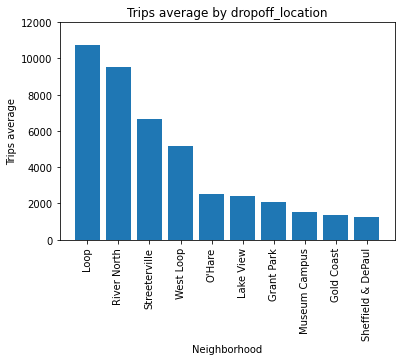

In [ ]:
# Hacer slice del dataframe de valores destacados para evitar aglomeración de valores del eje x
top_10_neighbhd_sliced = top_10_neighbhd[0:10]

# Gráfico de barras a partir del slice del dataframe
plt.figure()

plt.bar(top_10_neighbhd_sliced['dropoff_location_name'], top_10_neighbhd_sliced['average_trips'])

plt.xlabel('Neighborhood')
plt.ylabel('Trips average')

plt.xticks(rotation=90)

plt.ylim((None,12000))

plt.title( 'Trips average by dropoff_location')

plt.show()

array([[<AxesSubplot:title={'center':'average_trips'}>]], dtype=object)

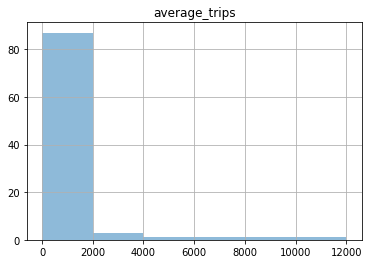

In [ ]:
top_10_neighbhd.hist(bins=[0, 2000, 4000, 6000, 8000, 10000, 12000], alpha=0.5)

### Observaciones

En el gráfico de barras se observa que Loop es el destino de viaje principal, con un promedio de 10727 viajes, seguido de River North con un promedio de 9524 viajes.

En el histograma se observa que la mayoria de los destinos están entre 1 y 2000 viajes, y la distribución de las frecuencias muestra un sesgo a la izquierda ya que hay mas destinos con bajos valores de viajes.


### Top 10 compañias por viajes realizados

In [ ]:
top_10_companies = trips.groupby('company_name')[['trips_amount']].sum().sort_values(by='trips_amount', ascending=False).reset_index()

display ( top_10_companies.head(10) )

top_10_companies.info()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


### Empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones

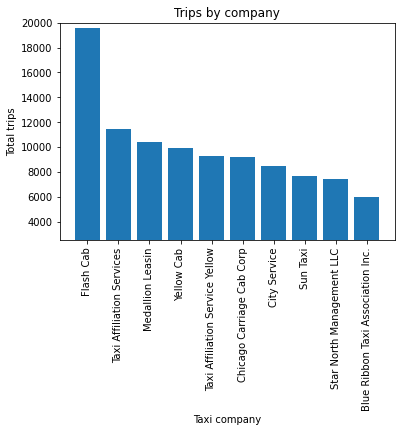

In [ ]:
# Hacer slice del dataframe de valores destacados para evitar aglomeración de valores del eje x
top_10_companies_slice = top_10_companies[0:10]

plt.figure()

plt.bar(top_10_companies_slice['company_name'], top_10_companies_slice['trips_amount'])

plt.xlabel('Taxi company')
plt.ylabel('Total trips')

plt.xticks(rotation=90)

plt.ylim((2500,20000))

plt.title( 'Trips by company')

plt.show()

array([[<AxesSubplot:title={'center':'trips_amount'}>]], dtype=object)

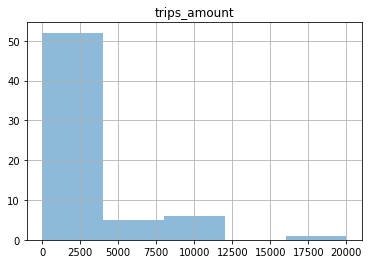

In [ ]:
top_10_companies.hist(bins=[0, 4000, 8000, 12000, 16000, 20000], alpha=0.5)


### Observaciones

En el gráfico de barras se observa que Flash Cab es la compañia principal, con 19558 viajes realizados, casi el doble de la copañia que le sigue Taxi Affiliation Services (11422)

En el histograma se observa que la mayoria de las compañias de taxi realizan entre 1 y 4000 viajes, y la distribución de las frecuencias muestra un sesgo a la izquierda ya que hay mas compañias con bajos valores de viajes, considerando que el top 10 esta entre 6000 y 20000 viajes.

## Prueba de hipótesis

- Hipotesis: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".
-
- Hipotesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare <b>no</b> cambia los sabados lluviosos
-
- Hipotesis alternativa: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare <b>sí</b> cambia los sabados lluviosos
-
- Nivel de significación (alfa) = 0.05

In [ ]:
# Datos de los viajes al aeropuerto O'Haren


# Verificando mediante la agrupación por dias de la semana que dias hay en el dataframe (5 = sabado)
day_of_week_verif = trips_airport.groupby(trips_airport['start_ts'].dt.dayofweek)['duration_seconds'].mean()
display(day_of_week_verif)

trip_duration_bad = trips_airport[trips_airport['weather_conditions'] == 'Bad']['duration_seconds']
display(trip_duration_bad)

trip_duration_good = trips_airport[trips_airport['weather_conditions'] == 'Good']['duration_seconds']
display(trip_duration_good)



start_ts
5    2071.731273
Name: duration_seconds, dtype: float64

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 180, dtype: float64

0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1062    1500.0
1063       0.0
1064    1318.0
1065    2100.0
1066    1380.0
Name: duration_seconds, Length: 888, dtype: float64

In [ ]:
# Analisis de varianza

m1 = np.var(trip_duration_bad)
print('varianza_bad =', m1)

m2 = np.var(trip_duration_good)
print('varianza_good =', m2)

# relación entre las varianzas: (mayor entre menor)
print()
relacion_var = m2 / m1
print( 'relación_varianza =', relacion_var )



varianza_bad = 517403.56330246915
varianza_good = 575732.9308497686

relación_varianza = 1.1127347619622028


Regla empirica de la varianza
Si la relación es menor que 4, puede asumirse que las varianzas son aproximadamente iguales y usar la prueba t de Student.

En este el valor obtenido (1.112...) cumple con este criterio por lo que podemos hacer uso de la prueba t

In [ ]:
# Prueba las hipótesis

alpha = 0.05

results = st.ttest_ind(trip_duration_bad, trip_duration_good)
print( f'valor p: {results.pvalue}' )


if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p: 6.517970327099473e-12
Rechazamos la hipótesis nula


## Conclusiones

- Los clientes prefieren viajar en empresas como Flashcab, se recomienda investigar sobre su oferta al cliente y evaluar si Zuber sería competetitiva
- También prefieren vaiajar a los barrios de Loop, Rivernorth y Streeteville
- Factores externos como el clima sí afecta la duración de los viajes


Rechazamos la hipotesis nula de acuerdo a la prueba T, el valor p es demasiado bajo (6.517e-10 en % de probabilidad de obtener aleatoriamente una diferencia de ese tamaño o mayor). Por lo tanto se cumple la hipotesis alternativa:
- La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare sí cambia los sabados lluviosos
- Se utiliza una prueba bilateral ya que no se sabe con certeza si la diferencia es significativa en la dirección positiva o negativa
- La empresa FlashCab tiene amplia presencia en la ciudad, que su numero de viajes resulta atipico comparado a las otras que se mantienen en valores cercanos (al menos del top 10), se tiene que indagar mas en cuanto a lo que esta compañia ofrece, asi Zuber tiene posibilidades de competir en el mercado.

- Los barrios de Loop, Rivernorth y Streeteville son los destinos mas populares en los viajes realizados por las compañias
-
-
- El poder recuperar datos de distintas fuentes compatibles es una gran herramienta que nos permite tener mas información con la cual trabajar y relacionar a otro conjunto de datos que tengamos y complementar nuestro análisis
-
- El uso de SQL es algo fundamental hoy dia en las industrias, la habilidad de comunicarse con bases de datos relacionales y obtener la información precisa que se requiera para algun análisis concreto
